## Aufgabe 1
Definieren Sie die Funktion
$$f(s):= \int_0^\infty x^{s-1} e^{-x} dx, \quad s > 0$$
und berechnen Sie $f(1), f(2), \dots ,f(10)$. 
Erkennen Sie einen Zusammenhang zu einer klassischen Funktion? Berechnen Sie $\left( \frac{8 \cdot f(2) \cdot f(5/2)}{f(4)} \right)^2.$ 
<em>Hinweis</em>: Lesen sie dazu die Hilfe von <strong>integrate</strong> und verwenden sie eine Funktion mit <strong>def</strong> .
Programmieren sie wieder zwei Versionen: eine mit *list comprehensions* und die andere mit Hilfe der map()-funktion.

In [1]:
integrate?

In [1]:
# Definition als Python-Funktion ("black box")
reset()
def g(s): return integrate(x^(s-1)*exp(-x),x,0,oo)
g(2)

In [1]:
[g(m) for m in range(1,11) ]

In [1]:
map(g, [1..10])

In [1]:
map(lambda s: integrate(x^(s-1)*exp(-x),x,0,oo), [1..10])

In [1]:
(8*g(2)*g(5/2)/g(4))^2

## Aufgabe 2
Bestimmen Sie das Integral von $x^2$ im Bereich 0 bis 1 sowohl symbolisch als auch numerisch. F&uuml;r die numerische Berechnung nutzen sie folgenden Algorithmus aus:  
Bestimmen Sie zuf&auml;llig 1000 Punkte im Bereich $0\leq x \leq 1$ und $0 \leq y \leq 1$ und testen Sie, ob die Punkte jeweils unter oder &uuml;ber $f(x)=x^2$ liegen. Das Integral ist dann gegeben durch das Verh&auml;ltnis von der Anzahl der Punkte unter dem Integral zu der gesamten Anzahl der Punkte.  

In [1]:
reset()
integral(x^2, (x, 0, 1))

In [1]:
c = 0
for k in [1..1000]:
    randx = randint(0,1000)/1000
    randy = randint(0,1000)/1000
    if randy < randx^2:
        c += 1
int = c/1000
print float(int)

In [1]:
#alternativ mit sage-funktion
numerical_integral(x^2,0,1)

## Aufgabe 3
Berechnen Sie $$4\quad\int_0^1 \frac{dx}{1+x^2},\quad \int_0^\pi e^x \sin x\,dx, \quad \int\frac{1}{e^x+e^{-x}} dx.$$

In [1]:
4*integral(1/(1+x^2), x,0,1)

In [1]:
integral(sin(x)*exp(x), x,0,pi)

In [1]:
integral(1/(exp(x)+exp(-x)), x)

## Aufgabe 4

Erstellen Sie folgende stückweise-definierte Funktion mit ```piecewise```

$$\begin{array} \ x^3,& \quad \text{in } [-1,1]\\
x^2,& \quad \text{in } (1,3) \end{array}$$

* Bestimmen Sie das exakte Integral der Funktion im gesamten Definitionsbereich.
* Berechnen Sie die Riemann-Summen der Teilintegrale für alle $n \in [5,100]$ mit der Funktion aus der Vorlesung.
* Bestimmen Sie den absoluten Fehler aller Summen zum exakten Integral und 
* bestimmen Sie dann automatisch dasjenige $n,$ für welches der Fehler unter $10^{-3}$ sinkt.
* Plotten Sie die Funktion und ihre Riemann-Teilntegrale mit diesem bestimmten $n.$

In [1]:
f1(x) = x^3
f2(x) = x^2 
f = piecewise([[[-1,1],f1],[(1,3),f2]]); f # Achtung, die Funktion muss am Punkt x=1 definiert sein!

piecewise(x|-->x^3 on [-1, 1], x|-->x^2 on (1, 3); x)

In [2]:
ireal = f.integral(definite=True); ireal

26/3

In [3]:
# Kopiere aus der Vorlesung
def riemann_sum_mp(f, a, b, n):
    # Calculates the Riemann-sum of f in the interval (a, b) using n steps
    step_size = (b-a)*1.0/n
    x_values = [(a+step_size*i).n() for i in range(n+1)] # Calculates the sub-intervals
    # Calculates the function-value at the midpoints of the intervals, weighted by stepsize
    values_mp = [(f((x_values[i]+x_values[i+1])/2)).n() for i in range(n)]
    y_mp = zip(zip(x_values[0:(n)], x_values[1:(n+1)]), values_mp)
    return y_mp, (step_size*sum(values_mp)).n()

In [4]:
irie = [(abs(riemann_sum_mp(f, -1, 3, ceil(n))[1] -ireal),n) for n in range(5,100)]; irie

[(0.0330666666666648, 5),
 (0.0740740740740744, 6),
 (0.0152714146883248, 7),
 (0.0416666666666661, 8),
 (0.00884011583600142, 9),
 (0.0266666666666655, 10),
 (0.00578284725542311, 11),
 (0.0185185185185190, 12),
 (0.00408482429419976, 13),
 (0.0136054421768712, 14),
 (0.00304197530864059, 15),
 (0.0104166666666661, 16),
 (0.00235469722185755, 17),
 (0.00823045267489952, 18),
 (0.00187741550990772, 19),
 (0.00666666666666416, 20),
 (0.00153228335929967, 21),
 (0.00550964187327629, 22),
 (0.00127453327663574, 23),
 (0.00462962962963154, 24),
 (0.00107690666666471, 25),
 (0.00394477317553843, 26),
 (0.000922021447347987, 27),
 (0.00340136054422047, 28),
 (0.000798362555570975, 29),
 (0.00296296296296106, 30),
 (0.000698053067191395, 31),
 (0.00260416666666607, 32),
 (0.000615555336315410, 33),
 (0.00230680507497105, 34),
 (0.000546883243094598, 35),
 (0.00205761316872533, 36),
 (0.000489107748299134, 37),
 (0.00184672206832737, 38),
 (0.000440037156771211, 39),
 (0.00166666666666337, 40)

In [1]:
bigerrors = filter(lambda x: x[0]>10^(-3),irie); bigerrors

In [1]:
[y_mp, int_rie] = riemann_sum_mp(f, -1, 3, bigerrors[0][1])

In [1]:
grey=(0.7,0.6,0.6)
P = f.plot((x, -1, 3), rgbcolor=(0.7,0.1,0.5), plot_points=40, )
Q1 = add([line([[a,0],[a,g]],rgbcolor=grey) for ((a, b), g) in y_mp])
Q2 = add([line([[b,0],[b,g]],rgbcolor=grey) for ((a, b), g) in y_mp])
Q3 = add([line([[a,g],[b,g]],rgbcolor=grey) for ((a, b), g) in y_mp])
(P+Q1+Q2+Q3).show(xmin=-1, xmax=3)

## Aufgabe 5

Arbeiten Sie mit ```piecewise```.

* Bestimmen Sie die Faltung (engl. convolution) der Funktionen $g(x) = f(x) = \begin{cases} 1, & 0 \leq x \leq 1, \\ 0 & \text{sonst} \end{cases}$. Plotten Sie die Funktion auf dem Intervall $[0, \, 2].$
* Berechnen Sie die Faltung der Funktionen $g(x) = \begin{cases} 3-\frac{1}{4}x, & x \in (4,8), \\ \frac{1}{4}x-1 & x \in [8,12] \end{cases}$ bzw. $f(x) = \begin{cases} \frac{3}{2}, & x \in [4,8], \\ 0 & \text{sonst} \end{cases}$. Plotten Sie die Funktion auf dem Intervall $[8, \, 20].$

In [1]:
# a)
f = piecewise([[[0,1],1]]); f
g = piecewise([[[0,1],1]]); g

In [1]:
h = f.convolution(g); h
h.plot((x, 0, 2), rgbcolor=(0.7,0.1,0.5), plot_points=40)

In [3]:
# b)
f = piecewise([[[4, 2*4], 3/2]]); f
g = piecewise([[[4, 2*4], 3 - 1/4*x], [(2*4, 3*4), 1/4*x-1]])

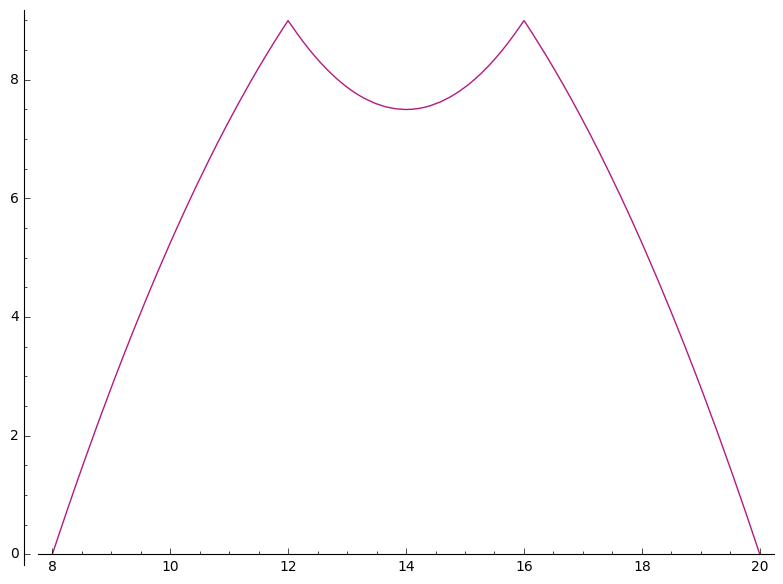

In [4]:
h = f.convolution(g); h
h.plot((x, 8, 20), rgbcolor=(0.7,0.1,0.5), plot_points=40)

## Zusatzaufgabe: Aufgabe 6
In Sage gibt es auch einen <a title="Sudoku-Solver" href="http://doc.sagemath.org/html/en/reference/games/sage/games/sudoku.html" target="_blank">Soduko-Solver</a>. Lesen Sie sich die Reference genau durch und ermitteln Sie eine Lösung für das folgende Sudoku:
$$\begin{pmatrix}
5 & 4 & 6 & | & \cdot & \cdot & \cdot & | & \cdot & \cdot & \cdot\\
\cdot & 2 & \cdot & | & 6 & \cdot & 3 & | & \cdot & \cdot & 1\\
\cdot & \cdot & \cdot & | & \cdot & 2 & 9 & | & \cdot & 7 &  \cdot\\
- & - & - & - & - & - & - & - & - & - & -\\
7 & 5 & \cdot & | & 3 & \cdot & \cdot & | & \cdot & 4 & 9\\
\cdot & \cdot & \cdot & | & 9 & \cdot & 4 & | & \cdot & \cdot & \cdot\\
4 & \cdot & \cdot & | & \cdot & \cdot & \cdot & | & 8 & 2 & 3\\
- & - & - & - & - & - & - & - & - & - & -\\
\cdot & \cdot & \cdot & | & 4 & \cdot & 1 & | & \cdot & 6 & \cdot\\
\cdot & \cdot & \cdot & | & \cdot & \cdot & \cdot & | & 3 & 1 & 5\\
\cdot & 3 & 8 & | & \cdot & \cdot & \cdot & | & 2 & \cdot & \cdot\\
\end{pmatrix}$$
<em>Hinweis:</em> Vergessen Sie nicht, ```sage.games.sudoku``` zu importieren!

In [9]:
import sage.games.sudoku

In [10]:
a = Sudoku('546.......2.6.3..1....29.7.75.3...49...9.4...4.....823...4.1.6.......315.38...2..')
print(a)

+-----+-----+-----+
|5 4 6|     |     |
|  2  |6   3|    1|
|     |  2 9|  7  |
+-----+-----+-----+
|7 5  |3    |  4 9|
|     |9   4|     |
|4    |     |8 2 3|
+-----+-----+-----+
|     |4   1|  6  |
|     |     |3 1 5|
|  3 8|     |2    |
+-----+-----+-----+


In [11]:
print(next(a.solve()))

+-----+-----+-----+
|5 4 6|8 1 7|9 3 2|
|9 2 7|6 4 3|5 8 1|
|8 1 3|5 2 9|4 7 6|
+-----+-----+-----+
|7 5 1|3 8 2|6 4 9|
|3 8 2|9 6 4|1 5 7|
|4 6 9|1 7 5|8 2 3|
+-----+-----+-----+
|2 9 5|4 3 1|7 6 8|
|6 7 4|2 9 8|3 1 5|
|1 3 8|7 5 6|2 9 4|
+-----+-----+-----+
